In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

In [67]:
data = pd.read_csv(r'C:\Users\p\Desktop\open\open\train.csv')

In [68]:
import datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['dayofweek'] = data['timestamp'].dt.dayofweek

data

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,dayofweek
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2,2
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27,0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28,1
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1,2
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2,3


In [69]:
encoding_columns = ['item','corporation', 'location']
not_encoding_columns = ['ID', 'timestamp', 'supply(kg)', 'price(원/kg)', 'year', 'month', 'day', 'dayofweek']

In [70]:
# 범주형 데이터 변환

enc_classes = {}

def encoding_labels(x):
    le = LabelEncoder()
    label = le.fit_transform(x)
    enc_classes[x.name] = le.classes_
    return label

In [71]:
d1 = data[encoding_columns].apply(encoding_labels)
d1.head()

,item,corporation,location
0,4,0,0
1,4,0,0
2,4,0,0
3,4,0,0
4,4,0,0


In [72]:
d2 = data[not_encoding_columns]
d2.head()

,ID,timestamp,supply(kg),price(원/kg),year,month,day,dayofweek
0,TG_A_J_20190101,2019-01-01,0.0,0.0,2019,1,1,1
1,TG_A_J_20190102,2019-01-02,0.0,0.0,2019,1,2,2
2,TG_A_J_20190103,2019-01-03,60601.0,1728.0,2019,1,3,3
3,TG_A_J_20190104,2019-01-04,25000.0,1408.0,2019,1,4,4
4,TG_A_J_20190105,2019-01-05,32352.0,1250.0,2019,1,5,5


In [73]:
data = d1.join(d2)
data

,item,corporation,location,ID,timestamp,supply(kg),price(원/kg),year,month,day,dayofweek
0,4,0,0,TG_A_J_20190101,2019-01-01,0.0,0.0,2019,1,1,1
1,4,0,0,TG_A_J_20190102,2019-01-02,0.0,0.0,2019,1,2,2
2,4,0,0,TG_A_J_20190103,2019-01-03,60601.0,1728.0,2019,1,3,3
3,4,0,0,TG_A_J_20190104,2019-01-04,25000.0,1408.0,2019,1,4,4
4,4,0,0,TG_A_J_20190105,2019-01-05,32352.0,1250.0,2019,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...
59392,3,5,0,RD_F_J_20230227,2023-02-27,452440.0,468.0,2023,2,27,0
59393,3,5,0,RD_F_J_20230228,2023-02-28,421980.0,531.0,2023,2,28,1
59394,3,5,0,RD_F_J_20230301,2023-03-01,382980.0,574.0,2023,3,1,2
59395,3,5,0,RD_F_J_20230302,2023-03-02,477220.0,523.0,2023,3,2,3


Root Mean Squared Error: 444.2070423046239
                               Actual    Predicted
1970-01-01 00:00:00.000000054     0.0   -58.567169
1970-01-01 00:00:00.000000109     0.0   -76.692413
1970-01-01 00:00:00.000000273  1719.0  2322.622803
1970-01-01 00:00:00.000000564  5159.0  6795.452637
1970-01-01 00:00:00.000000644  2104.0  2037.900024
...                               ...          ...
1970-01-01 00:00:00.000058304   421.0   450.871399
1970-01-01 00:00:00.000058521     0.0    -2.783986
1970-01-01 00:00:00.000058786   459.0   480.386261
1970-01-01 00:00:00.000058841     0.0     9.662823
1970-01-01 00:00:00.000059045   415.0   403.768799

[238 rows x 2 columns]


C:\Users\p\AppData\Local\Temp\ipykernel_24224\4213147936.py:38: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
C:\Users\p\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


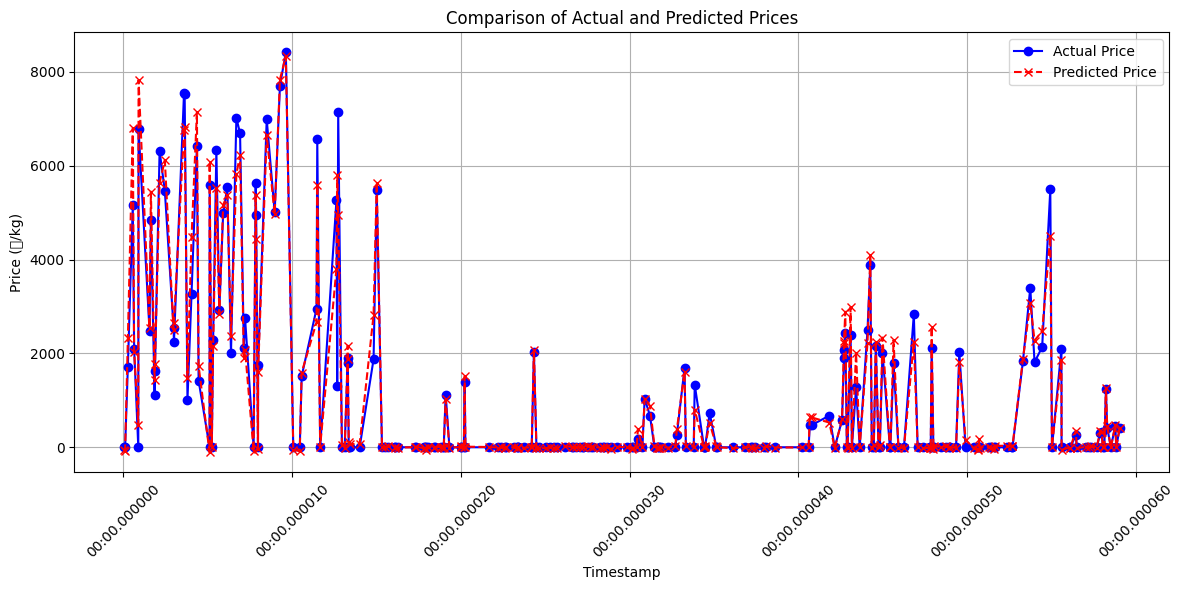

In [92]:
# Feature와 Target 데이터셋 분리
X = data[['item','corporation','location','year','month','day','dayofweek','supply(kg)']]
y = data['price(원/kg)']

# 학습 데이터셋과 테스트 데이터셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.004, random_state=42)

# XGBoost 모델 정의 및 훈련
model = XGBRegressor()
model.fit(X_train, y_train)

# Pred 사용하여 예측값 계산
y_pred = model.predict(X_test)

# RMSE 사용
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

# 예측값과 실제값 비교 및 정렬
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.index = pd.to_datetime(comparison.index)
comparison_sorted = comparison.sort_index()
print(comparison_sorted)

# 시각화
plt.figure(figsize=(12, 6))

# 정렬된 데이터를 기반으로 실제값과 예측값 그래프 그리기
plt.plot(comparison_sorted.index, comparison_sorted['Actual'], marker='o', linestyle='-', color='blue', label='Actual Price')
plt.plot(comparison_sorted.index, comparison_sorted['Predicted'], marker='x', linestyle='--', color='red', label='Predicted Price')

plt.title('Comparison of Actual and Predicted Prices')
plt.xlabel('Timestamp')
plt.ylabel('Price (원/kg)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # x 축 라벨 회전
plt.tight_layout()
plt.show()


In [75]:
test_data = pd.read_csv(r'C:\Users\p\Desktop\open\open\test.csv')
test_data

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J
...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J
1088,RD_F_J_20230328,2023-03-28,RD,F,J
1089,RD_F_J_20230329,2023-03-29,RD,F,J
1090,RD_F_J_20230330,2023-03-30,RD,F,J


In [76]:
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'])

test_data['year'] = test_data['timestamp'].dt.year
test_data['month'] = test_data['timestamp'].dt.month
test_data['day'] = test_data['timestamp'].dt.day
test_data['dayofweek'] = test_data['timestamp'].dt.dayofweek

test_data

,ID,timestamp,item,corporation,location,year,month,day,dayofweek
0,TG_A_J_20230304,2023-03-04,TG,A,J,2023,3,4,5
1,TG_A_J_20230305,2023-03-05,TG,A,J,2023,3,5,6
2,TG_A_J_20230306,2023-03-06,TG,A,J,2023,3,6,0
3,TG_A_J_20230307,2023-03-07,TG,A,J,2023,3,7,1
4,TG_A_J_20230308,2023-03-08,TG,A,J,2023,3,8,2
...,...,...,...,...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J,2023,3,27,0
1088,RD_F_J_20230328,2023-03-28,RD,F,J,2023,3,28,1
1089,RD_F_J_20230329,2023-03-29,RD,F,J,2023,3,29,2
1090,RD_F_J_20230330,2023-03-30,RD,F,J,2023,3,30,3


In [77]:
encoding_columns = ['item','corporation', 'location']
not_encoding_columns = ['ID', 'timestamp','year', 'month', 'day', 'dayofweek']

In [78]:
enc_classes = {}

def encoding_labels(x):
    le = LabelEncoder()
    label = le.fit_transform(x)
    enc_classes[x.name] = le.classes_
    return label

In [79]:
d1 = test_data[encoding_columns].apply(encoding_labels)
d1.head()

,item,corporation,location
0,4,0,0
1,4,0,0
2,4,0,0
3,4,0,0
4,4,0,0


In [80]:
d2 = test_data[not_encoding_columns]
d2.head()

,ID,timestamp,year,month,day,dayofweek
0,TG_A_J_20230304,2023-03-04,2023,3,4,5
1,TG_A_J_20230305,2023-03-05,2023,3,5,6
2,TG_A_J_20230306,2023-03-06,2023,3,6,0
3,TG_A_J_20230307,2023-03-07,2023,3,7,1
4,TG_A_J_20230308,2023-03-08,2023,3,8,2


In [85]:
test_data = d1.join(d2)
test_data

,item,corporation,location,ID,timestamp,year,month,day,dayofweek
0,4,0,0,TG_A_J_20230304,2023-03-04,2023,3,4,5
1,4,0,0,TG_A_J_20230305,2023-03-05,2023,3,5,6
2,4,0,0,TG_A_J_20230306,2023-03-06,2023,3,6,0
3,4,0,0,TG_A_J_20230307,2023-03-07,2023,3,7,1
4,4,0,0,TG_A_J_20230308,2023-03-08,2023,3,8,2
...,...,...,...,...,...,...,...,...,...
1087,3,5,0,RD_F_J_20230327,2023-03-27,2023,3,27,0
1088,3,5,0,RD_F_J_20230328,2023-03-28,2023,3,28,1
1089,3,5,0,RD_F_J_20230329,2023-03-29,2023,3,29,2
1090,3,5,0,RD_F_J_20230330,2023-03-30,2023,3,30,3


In [89]:
X_new = test_data[['item','corporation','location','year','month','day','dayofweek']]
y_pred_new = model.predict(X_new)
test_data['predicted_price'] = y_pred_new
test_data

ValueError: feature_names mismatch: ['item', 'corporation', 'location', 'year', 'month', 'day', 'dayofweek', 'supply(kg)'] ['item', 'corporation', 'location', 'year', 'month', 'day', 'dayofweek']
expected supply(kg) in input data